# CS229 Problem Set 2
## Prbolem 2：垃圾邮件分类

### 问题定义
实现一个贝叶斯分类器来进行垃圾邮件分类，要求使用多项式事件模型和拉普拉斯平滑。
(a)使用MATRIX.TRAIN进行训练，使用MATRIX.TEST进行测试，并输出误差。
(b)输出最具垃圾邮件代表性的5个词。
$$
\log \frac{p\left(x_{j}=i | y=1\right)}{p\left(x_{j}=i | y=0\right)}=\log \left(\frac{P(\text { token } i \text { (email is SPAM) }}{P(\text { token } i \text { (email is NOTSPAM) }}\right) )
$$
(c)对不同规模大小的训练集进行训练，并输出测试误差

**目标函数：**
![](https://yunlongs-1253041399.cos.ap-chengdu.myqcloud.com/image/Stanford/lecture-5-23.jpg)


**参数更新公式：**
![](https://yunlongs-1253041399.cos.ap-chengdu.myqcloud.com/image/Stanford/lecture-5-21.jpg)

**贝叶斯估计：**
![](https://yunlongs-1253041399.cos.ap-chengdu.myqcloud.com/image/Stanford/lecture-5-15.jpg)

In [1]:
from read_Matrix import read_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def nb_train(Y_lable,matrix):  ## 贝叶斯训练
    Y_lable = np.array(Y_lable)  # 训练集的标签
    param = {}
    N = matrix.shape[1]
    spam_matrix = matrix[Y_lable==1,:]   # 正样本（垃圾邮件）
    nonspam_matrix = matrix[Y_lable==0,:]  # 负样本

    n_spam= np.sum(spam_matrix,1)    # 每一样本单词个数
    n_nonspam = np.sum(nonspam_matrix,1)

    param["phi_spam"] = (np.sum((spam_matrix),0)+1)/(np.sum(n_spam)+N)  #Φk|y=1
    param["phi_nonspam"] = (np.sum((nonspam_matrix),0)+1)/(np.sum(n_nonspam)+N) #Φk|y=0
    param["phi"] = nonspam_matrix.shape[0]/matrix.shape[0]
    return param

In [3]:
def nb_test(param):
    _,_,Y,t_matrix = read_matrix("data/MATRIX.TEST")
    post_nonspam = np.zeros((t_matrix.shape[0],1))
    post_spam = np.zeros((t_matrix.shape[0],1))
    for i in range(t_matrix.shape[0]):
        p0 = 1
        p1 = 1
        for j in range(t_matrix.shape[1]):
            if t_matrix[i,j]!=0:
                p0 = p0* param["phi_nonspam"][j]**t_matrix[i,j]
                p1 = p1* param["phi_spam"][j]**t_matrix[i,j]
        post_nonspam[i] = p0 *param["phi"]
        post_spam[i] = p1 * (1-param["phi"])
    #post_nonspam = np.sum(np.log(t_matrix*param["phi_nonspam"]),1)+np.log(param["phi"])   # y=0时 p(xi|y=0)p(y=0) ，不需要计算p(x)
    #post_spam = np.sum(np.log(t_matrix*param["phi_spam"]),1)+np.log(1-param["phi"])  # y=1时 p(xi|y=1)p(y=1)
    Y_pred = np.zeros(t_matrix.shape[0])
    for i in range(t_matrix.shape[0]):
        if post_nonspam[i]<=post_spam[i]:
            Y_pred[i] = 1
        else:
            Y_pred[i] = 0
    return Y,Y_pred

In [4]:
def evaulate(Y_test,Y_pred):
    m_test = len(Y_test)
    n=0
    for i in range(m_test):
        if Y_test[i]!=Y_pred[i]:
            n += 1
    return n/m_test

### 问题(a)

In [6]:
def main_a():
    title,tokens,Y_label,matrix = read_matrix("data/MATRIX.TRAIN")
    param = nb_train(Y_label, matrix)
    Y_test, Y_pred = nb_test(param)
    error = evaulate(Y_test, Y_pred)
    print("error:%1.4f" % error)
main_a()

error:0.0825


### 问题（b）

In [7]:
def main_b(): #### question (b) find the indicative token
    title,tokens,Y_label,matrix = read_matrix("data/MATRIX.TRAIN")
    param = nb_train(Y_label, matrix)
    a=np.argsort(np.log(param["phi_spam"]/param["phi_nonspam"]))[-5:]
    pd_token = pd.read_csv('data/TOKENS_LIST',sep='\ +',names=["index","token"],engine='python')
    tokens = pd_token.values[a,1]
    print(tokens)
main_b()

['valet' 'ebai' 'unsubscrib' 'spam' 'httpaddr']


### 问题（c）

[0.10125, 0.09125, 0.09, 0.0825, 0.0825]


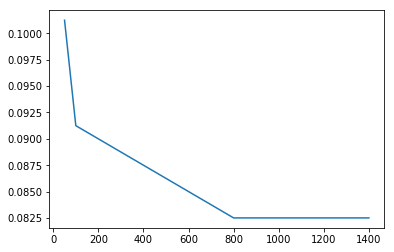

In [8]:
def main_c():
    trian_size = [50,100,200,800,1400]
    res = []
    for i,size in enumerate(trian_size):
        _,_,Y_label,matrix = read_matrix("data/MATRIX.TRAIN."+str(size))
        param = nb_train(Y_label,matrix)
        Y_test,Y_pred = nb_test(param)
        res.append(evaulate(Y_test,Y_pred))
    plt.plot(trian_size,res)
    print(res)
    plt.show()
main_c()